In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

df_train = pd.read_csv('data/train.csv').drop(['row_id'], axis=1)
df_test = pd.read_csv('data/test.csv').drop(['row_id'], axis=1)

In [3]:
df_test

,time,x,y,direction
0,1991-09-30 12:00:00,0,0,EB
1,1991-09-30 12:00:00,0,0,NB
2,1991-09-30 12:00:00,0,0,SB
3,1991-09-30 12:00:00,0,1,EB
4,1991-09-30 12:00:00,0,1,NB
...,...,...,...,...
2335,1991-09-30 23:40:00,2,3,NB
2336,1991-09-30 23:40:00,2,3,NE
2337,1991-09-30 23:40:00,2,3,SB
2338,1991-09-30 23:40:00,2,3,SW


In [4]:
df_train.direction.unique()

array(['EB', 'NB', 'SB', 'WB', 'NE', 'SW', 'NW', 'SE'], dtype=object)

In [5]:
df_train['year'] = df_train['time'].apply(lambda row: row[:4])
df_train['month'] = df_train['time'].apply(lambda row: row.split('-')[1][:2] )
df_train['day'] = df_train['time'].apply(lambda row: row.split('-')[2][:2] )
df_train['hour'] = df_train['time'].apply(lambda row: row.split(':')[0][-2:] )
df_train['mins'] = df_train['time'].apply(lambda row: row.split(':')[1] )
df_train['d'] = df_train['time'].apply(lambda row : row.split(':')[0])

In [18]:
df_train['dates'] = df_train['time'].apply(lambda row: row[:-9].split('-')[:3])
df_train['dates'] = df_train['dates'].apply(lambda row: datetime(int(row[0]), int(row[1]), int(row[2])))
df_train['weekdays'] = df_train['dates'].apply(lambda row: row.weekday())
df_train

,time,x,route,y,direction,congestion,year,month,day,hour,mins,d,dates,weekdays
0,1991-04-01 00:00:00,0,00EB,0,EB,70,1991,04,01,00,00,1991-04-01 00,1991-04-01,0
1,1991-04-01 00:00:00,0,00NB,0,NB,49,1991,04,01,00,00,1991-04-01 00,1991-04-01,0
2,1991-04-01 00:00:00,0,00SB,0,SB,24,1991,04,01,00,00,1991-04-01 00,1991-04-01,0
3,1991-04-01 00:00:00,0,01EB,1,EB,18,1991,04,01,00,00,1991-04-01 00,1991-04-01,0
4,1991-04-01 00:00:00,0,01NB,1,NB,60,1991,04,01,00,00,1991-04-01 00,1991-04-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,23NB,3,NB,54,1991,09,30,11,40,1991-09-30 11,1991-09-30,0
848831,1991-09-30 11:40:00,2,23NE,3,NE,28,1991,09,30,11,40,1991-09-30 11,1991-09-30,0
848832,1991-09-30 11:40:00,2,23SB,3,SB,68,1991,09,30,11,40,1991-09-30 11,1991-09-30,0
848833,1991-09-30 11:40:00,2,23SW,3,SW,17,1991,09,30,11,40,1991-09-30 11,1991-09-30,0


In [7]:
df_train.columns

Index(['time', 'x', 'y', 'direction', 'congestion', 'year', 'month', 'day',
       'hour', 'mins', 'd', 'dates'],
      dtype='object')

In [8]:
route_train = df_train['x'].astype(str) + df_train['y'].astype(str) + df_train['direction']
df_train.insert(2, 'route', route_train )
route_test = df_test['x'].astype(str) + df_test['y'].astype(str) + df_test['direction']
df_test.insert(2, 'route', route_test )

In [9]:
df_train['route'].value_counts()

13SW    13059
03WB    13059
03SW    13059
22NW    13059
22EB    13059
        ...  
02NB    13059
21EB    13059
11SB    13059
21WB    13059
00EB    13059
Name: route, Length: 65, dtype: int64

<AxesSubplot:xlabel='direction', ylabel='congestion'>

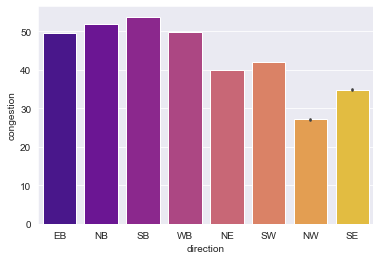

In [24]:
sns.set_style('darkgrid')
sns.barplot(x='direction', y='congestion', data = df_train, palette='plasma')

<AxesSubplot:xlabel='weekdays', ylabel='congestion'>

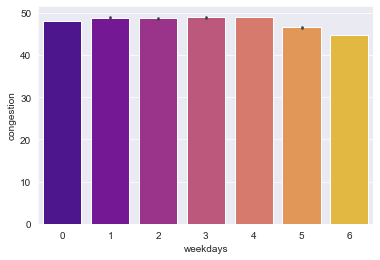

In [23]:
sns.set_style('darkgrid')
sns.barplot(x='weekdays', y='congestion', data = df_train, palette='plasma')

In [ ]:
## Which hours are the most congested
## Which hours are most congested / day

<AxesSubplot:xlabel='hour', ylabel='congestion'>

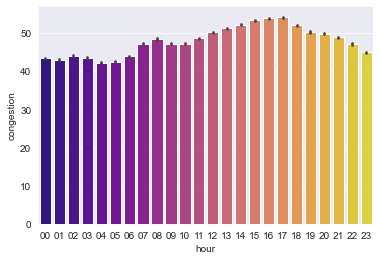

In [25]:
sns.set_style('darkgrid')
sns.barplot(x='hour', y='congestion', data = df_train, palette='plasma')

<AxesSubplot:xlabel='hour', ylabel='congestion'>

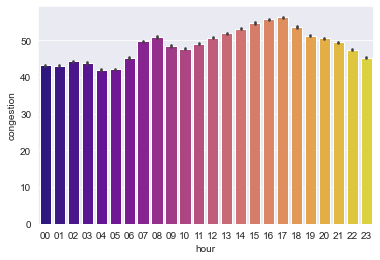

In [26]:
sns.set_style('darkgrid')
sns.barplot(x=df_train['hour'].loc[df_train['weekdays'] < 5], y='congestion', data = df_train, palette='plasma')

<AxesSubplot:xlabel='hour', ylabel='congestion'>

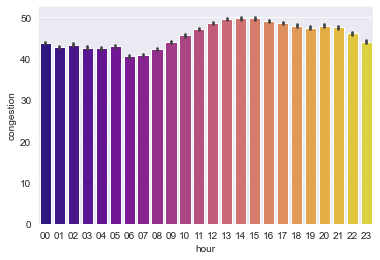

In [27]:
sns.set_style('darkgrid')
sns.barplot(x=df_train['hour'].loc[df_train['weekdays'] > 4], y='congestion', data = df_train, palette='plasma')

In [37]:
df_maxd = df_train.loc[df_train.groupby('day')['congestion'].idxmax()]
df_maxd

,time,x,route,y,direction,congestion,year,month,day,hour,mins,d,dates,weekdays
402,1991-04-01 02:00:00,0,03NB,3,NB,100,1991,04,01,02,00,1991-04-01 02,1991-04-01,0
289760,1991-06-02 03:00:00,2,22SB,2,SB,100,1991,06,02,03,00,1991-06-02 03,1991-06-02,6
296861,1991-06-03 15:40:00,0,01WB,1,WB,100,1991,06,03,15,40,1991-06-03 15,1991-06-03,0
16826,1991-04-04 14:00:00,2,22SE,2,SE,100,1991,04,04,14,00,1991-04-04 14,1991-04-04,3
735273,1991-09-05 17:20:00,2,22WB,2,WB,100,1991,09,05,17,20,1991-09-05 17,1991-09-05,3
308480,1991-06-06 03:00:00,2,22SB,2,SB,100,1991,06,06,03,00,1991-06-06 03,1991-06-06,3
168252,1991-05-07 03:20:00,1,12WB,2,WB,100,1991,05,07,03,20,1991-05-07 03,1991-05-07,1
320383,1991-06-08 16:00:00,2,23SW,3,SW,100,1991,06,08,16,00,1991-06-08 16,1991-06-08,5
40216,1991-04-09 14:00:00,2,21NW,1,NW,100,1991,04,09,14,00,1991-04-09 14,1991-04-09,1
42245,1991-04-10 00:20:00,2,23NB,3,NB,100,1991,04,10,00,20,1991-04-10 00,1991-04-10,2
